# Using R to analyze racial disparities in SF traffic stops

To start getting our hands dirty with applying our `R` skills, we're going to explore San Francisco's traffic stops. Our goals today are twofold:
1. To learn how to use `R` to deal with data and to answer policy questions. In addition to data-munging, we'll be computing descriptive statistics, plotting and even doing some modeling!
2. To get in the data science mindset: learning how to answer questions about social policies using data. In our case, we'll investigate whether there is racial discrimination in SF's policing practices, and we'll evaluate the impacts of certain policy changes like the legalization of marijuana.

## Getting started 

First, let's load the necessary libraries and data that will allow us to begin our investigation!

In [25]:
# Some initial setup
options(digits = 3)
library(tidyverse)
library(lubridate)
theme_set(theme_bw())
getwd()

# Read the data
stops <- read_rds("data/san_francisco_stop_data.rds")
pop_2015 <- read_rds("data/sf_pop_2015.rds")

[1] "/home/amyshoe/iriss-workshop/R"

### Covering the basics

The core of `R` is the dataframe. We've given you one to start with, in the form
of `stops`. Think of dataframes like a spreadsheet: they have rows and columns.
Usually, rows are a "datapoint": in `stops`, each row corresponds to a single
stop from San Francisco. The columns are the "variables": again, in `stops`,
these are the things we know about the stop, like where the stop happened, the
age of the driver, whether an arrest was made, and so on.

We can take a peak simply by typing `stops` into an R chunk:

In [2]:
head(stops)

[1] "/home/amyshoe/iriss-workshop/R"

### Functions

Functions are a way to "do something" to an input. So `f(a)=b` takes a number `a`, and applies `f()`, and gets the output `b`. In programming, we also have functions! Most of the functions we'll use allow us to manipulate our dataframe as the input. 

The function `head(stops)` gave us the first 6 rows of our data frame. If we want to find the number of rows in our dataframe, we'd use the function `nrow()`, which takes a dataframe (like `stops`) as an input, and then outputs an integer (the number of rows in `stops`).

In [5]:
nrow(stops)

[1] 851391

### Your turn

To find the number of columns, we (unsurprisingly) use `ncol`. Try it!

In [6]:
# Find the number of columns in `stops`
# START
ncol(stops)
# END

[1] 13

To figure out what the names of our columns are, we can use `colnames()`.

In [7]:
# Find the column names in `stops`
# START
colnames(stops)
# END

[1] "date"             "time"             "location"         "lat"             
 [5] "lng"              "district"         "age"              "race"            
 [9] "gender"           "arrested"         "contraband_found" "searched"        
[13] "reason_for_stop"

**Pro-tip:** If you're ever confused about a function and want to know more about it, what it does, how to use it, etc., every function has "documentation" to help! To know more about the `head()` function, simply run a code chunk with `?head`. It provides way more information than you might want or need -- but if you scroll down to the "Examples" section, those usually help!

## Exercise 1: Stop dates

For this first exercise, let's get a better sense of what time range our `stops` data covers. To do this, we'll be dealing with the `date` column in our dataframe. 

1. There are two ways to extract dates from our `stops` dataframe: `stops$date` and `pull(stops, date)`. Basically,`$` and `pull()` do the same thing. Run a code chunk with one of these to see what the output looks like.

2. What date range does our dataset cover? (Hint: Try exploring the `min()` and `max()` functions, or the `range()` function!)

In [8]:
## EXERCISE 1: YOUR CODE HERE
# START
# 1. 
# We get a list of the date each stop occurred on. 
# Both methods ($ and pull) do the same thing, they
# extract the column `date` from the df.

# 2. 
range(stops$date)
# END

[1] "2007-01-01" "2016-06-30"

Take a look at the two versions of the code below. Notice that they do the same thing. The "pipe" symbol -- `%>%` -- allows us to string functions together vertically, instead of nesting them.

In [8]:
# Confirm that these give the same answer:

# Method 1: nested
range(pull(stops, date))

# Method 2: multi-line
stops %>% 
    pull(date) %>% 
    range()


[1] "2007-01-01" "2016-06-30"

[1] "2007-01-01" "2016-06-30"

**tidyverse tip**: The second method uses a funky symbol, `%>%` called the "pipe", which is the crux of the tidyverse. The pipe helps to keep our code clean. It allows us to read top-down rather than inside-out (which is what method 1 above requires of us). Each line simply applies to the result of the previous line:
* We start with `stops`,
* then we apply `pull(date)` to the above (stops), getting us a list of dates,
* then we apply `range()` to the above (a list of dates).

More formally, the pipe operator
just places the previous item into the first argument of the function. So,
`x %>% f()` is simply `f(x)`. While in a one-function call the pipe might feel
silly and unnecessary, it's going to become _really_ helpful once we start
wanting to do multiple transformations to our data. 

## Preparing our data

For some of our analysis, we'll want to focus on the most recent full year: 2015.

To do this we'll want to use the _year_ of each stop, but _year_ isn't currently a column in our dataset. Let's add it!

**tidyverse function: `mutate()`**

We can use the `mutate()` function to fix add a `yr` column to `stops`.
The `mutate()` function adds new columns to a dataframe based on old columns.
The basic setup is `mutate(DATA, NEW_COL = FUN(OLD_COL))` where 
* `DATA` is our
dataframe, 
* `NEW_COL` is the name of the new column we want, and 
* `FUN` is the function we apply to the old column, `OLD_COL`, to get it.

### You try!

In the space below:

1. use the `year()` and `mutate()` functions to add a new column called `yr` to our `stops` dataframe, and
2. use the assignment operator `<-` (it's like = in `R`) to create a new variable, `stops_w_yr`.

In [28]:
# Add a yr column to `stops`
# START
stops_w_yr <- stops %>% 
    mutate(yr = year(date))
# END

**Recall:** When we write code chunks and _don't_ save our result using `<-`, that result does not overwrite or in any way change the data. To change the data, we need to use the process above, creating a new variable, or we could overwrite the original dataframe (`stops <- stops %>% ...` -- but be careful, because you could accidentally overwrite the dataframe with something you didn't expect!)

Now, we can investigate this new `yr` column in a few ways. 
1. We can check it's acutally there by looking at `colnames(stops_w_yr)`.
2. We can compute the range of years using `range(stops_w_yr$yr)`.
3. We can count the number of stops per year: `stops_w_yr %>% count(yr)`. 

### You try

Play around with these! Make sure to try the last one.

In [12]:
# Investigate your new `yr` column. 
# Make sure to try counting the number of stops per year!
# START
stops_w_yr %>%
    count(yr)
# END

yr,n
2007,102131
2008,113099
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


Looks like stops over the years are going down slightly. But there are two weird abberations: 2013 and 2016 seem _too_ low. 

### Back to data prep

Now let's get back to prepping our data. To get to our desired date range of the most recent full year (2015), we will 
1. Use the `filter()` function to specify the years we want, and 
2. Again use the assignment operator `<-` (it's like = in `R`) to create a new variable, `stops_2015`.

**tidyverse function: `filter()`**

* The `filter()` function is used to separate rows from the dataframe that
interest us from rows that do not. 
* In particular, `filter(DATA, CONDITION)`
returns `DATA` with all of the rows that satisfy `CONDITION` removed. 
* For
instance, we might want to only look at stops from 2015. To do this, we would type `stops %>% filter(yr == 2015)`, since we only want
rows from `stops` where the `yr` column is (i.e., `==`) `2015`. 
* We can also filter on multiple conditions, just separating each condition with a comma. So, for example, if we wanted all stops between 2011 and 2015, we would write `stops %>% filter(yr >= 2011, yr <=2015)`.

### Your turn

Create a new variable, `stops_2015` that is our stops dataframe filtered to just those that happened in the year (`yr`) 2015. 

In [29]:
# Use the filter function to get just stops from 2015
# START
stops_2015 <- 
    stops_w_yr %>%
    filter(yr == 2015)
# END

Just to be extra sure, let's check our date range in this new dataframe, `stops_2015`!

In [30]:
# What date range does stops_2015 cover?
# START
stops_2015$date %>% range()
# END

[1] "2015-01-01" "2015-12-31"

### Another one!

Look back and the stop counts by year -- are there any years that look suspicious? (Remember, 2014 looked pretty low.) How could we use `filter()` and `range()` to investigate whether suspiciously low years have a full year of data?

In [31]:
# Try it out!
# START
stops_w_yr %>%
    filter(yr == 2014) %>%
    pull(date) %>%
    range()
# END

[1] "2014-01-01" "2014-05-30"

## Getting multiple answers at once!

To answer the problem above for a _different_ year, we'd have to filter to again to that individual year of data and test the date range of that year. Instead of doing this _for each_ year separately, let's do it all in one go! 

To do this, we basically want to apply the same command to each of the years, rather than filtering one at a time to each year. The key to doing this type of manipulation uses two new functions: `group_by` and `summarize`.

**tidyverse functions: `group_by()` and `summarize()`**

One thing that we often want to do with data is disaggregate it. That is, we
might want to take the data and break it down into smaller subpopulations. Then,
when we ask questions, we can ask about each piece---for instance, each
demographic group, each year, or each police district---instead of asking about the population as a whole.

The way to do this in `R` is with `group_by()` and `summarize()`. The standard way
to use `group_by()` is to call `group_by(DATA, COL_NAME)`, where 
* `DATA` is our dataframe and 
* `COL_NAME` is the name of a column. 
What `group_by()` then does is
take all the rows in the dataframe `DATA` and put them into different groups,
one for each different value in the column `COL_NAME`. So, for instance, if we
called `group_by(stops_w_yr, district)`, `R` would hand back to us the `stops_w_yr`
dataframe with all of its columns broken into different groups, one for each
police district. (Note: At this stage, the dataframe doesn't _look_ any different to the human eye, since the groupings are happening behind the scenes.)

Try it below!

In [ ]:
stops_w_yr %>%
    group_by(district)

The second step is to do something with those groups. That's what `summarize()`
does. The way `summarize()` works is to take a dataframe broken into groups by
`group_by()` and calculate a statistic for each group. The basic syntax is
`summarize(DATA, STAT = FUN(COL_NAME))`, where 
* `DATA` is some dataframe broken
up by `group_by()`, 
* `STAT` is some statistic we want to calculate, 
* `FUN` is the
function that calculates that statistic, and 
* `COL_NAME` is the name of the
column (or columns) used to calculate the statistic.

Let's put it all together with a few examples first.

In [62]:
stops_w_yr %>%
    group_by(district) %>%
    summarize(
        # The function n() just gives us the number of rows in each gropu
        n_stops = n(),
        n_arrests = sum(arrested),
        arrest_rate = n_arrests / n_stops
    )

district,n_stops,n_arrests,arrest_rate
A,69677,631,0.00906
B,105867,1165,0.01100
C,95406,1473,0.01544
D,87702,1874,0.02137
E,73846,969,0.01312
F,61713,640,0.01037
G,85276,969,0.01136
H,117520,1858,0.01581
I,108213,1121,0.01036
J,46171,764,0.01655


In [63]:
stops_w_yr %>%
    group_by(district) %>%
    summarize(most_recent_stop = max(date))

district,most_recent_stop
A,2016-06-30
B,2016-06-30
C,2016-06-30
D,2016-06-30
E,2016-06-30
F,2016-06-30
G,2016-06-30
H,2016-06-30
I,2016-06-30
J,2016-06-30


## Exercise 2: Date ranges by year

Using your new friends `group_by` and `summarize`, compute the min and max dates for each year. (Hint: Using `range()` alone will give you an error, because it returns two values, which we can't shove into one column. Try using `min()` and `max()` to make two separate columns, or you can try doing some wizardly string magic to make a single column out of the `range()` output!)

In [71]:
# YOUR CODE HERE
# START
# METHOD 1
stops_w_yr %>% 
    group_by(yr) %>%
    summarize(
        min_date = min(date), 
        max_date = max(date)
    )
# METHOD 2
stops_w_yr %>%
    group_by(yr) %>%
    summarize(
        date_range = str_c(range(date)[1], " to ", range(date)[2])
    )
# END

yr,min_date,max_date
2007,2007-01-01,2007-12-31
2008,2008-01-01,2008-12-31
2009,2009-01-01,2009-12-31
2010,2010-01-01,2010-12-31
2011,2011-01-01,2011-12-31
2012,2012-01-01,2012-12-31
2013,2013-01-01,2013-12-31
2014,2014-01-01,2014-05-30
2015,2015-01-01,2015-12-31
2016,2016-01-01,2016-06-30


yr,date_range
2007,2007-01-01 to 2007-12-31
2008,2008-01-01 to 2008-12-31
2009,2009-01-01 to 2009-12-31
2010,2010-01-01 to 2010-12-31
2011,2011-01-01 to 2011-12-31
2012,2012-01-01 to 2012-12-31
2013,2013-01-01 to 2013-12-31
2014,2014-01-01 to 2014-05-30
2015,2015-01-01 to 2015-12-31
2016,2016-01-01 to 2016-06-30


### Plotting

The method above gives us a sense of whether we are missing chunks of data at the beginning or end of a year, but what if we're missing data in the middle? It'd be nice to look at a plot of stops by day. 

Before doing that, though, let's build up some basic plotting skills in `R`.

The basics of plotting use a package called `ggplot2`. The idea behind this package is that you start with a dataset, and then layer the elements you want: points, lines, bars, tweaking the x-axis, tweaking the title, etc. Each thing you'd want to do is a separate function. The difference between `ggplot` and what we've been doing before, is that the functions for plotting are strung together with `+` rather than with `%>%`.

We'll walk you through the first plot, and then you'll have ample opportunities to create your own plots throughout the afternoon!

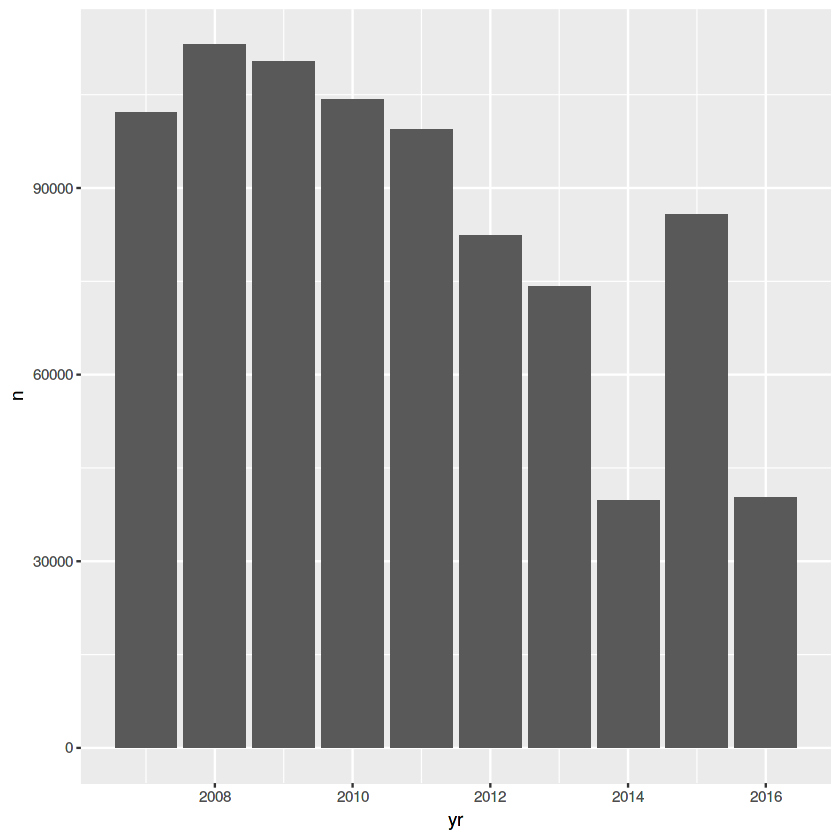

In [44]:
stops_w_yr %>%
    count(yr) %>%
    # "aes()" stands for "aesthetic". 
    # Anything within `aes()` refers to information from our data (stops_w_yr)
    ggplot(aes(x = yr, y = n)) + 
    # geom_col just creates bar columns using the x and y coordinates specified
    geom_col()

### Exercise 3: Line graphs

Instead of making a bar chart with`geom_col()`, try making a line graph, with points at each year. You can use the same intro as in our example, but instead of `geom_bar()`, try using `geom_point()` and `geom_line()`. (Remember, you can always type `?geom_point` if you need help and want to read the manual! Or, you can check out [this cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)!)

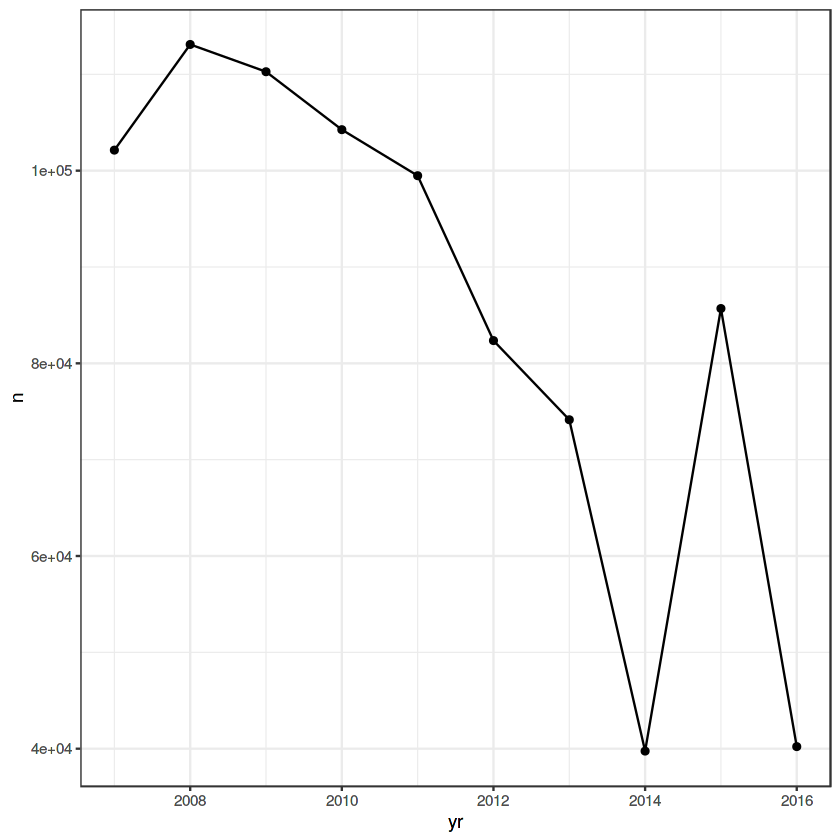

In [33]:
# YOUR CODE HERE
# START
stops_w_yr %>%
    count(yr) %>%
    # "aes()" stands for "aesthetic". 
    # Anything within `aes()` refers to information from our data (stops_w_yr)
    ggplot(aes(x = yr, y = n)) + 
    # geom_point adds points at the x and y coordinates specified
    geom_point() + 
    # geom_line draws lines between x and y coordinates specified
    geom_line()
# END

GIVE SYNTAX FOR SCALE and have them do it

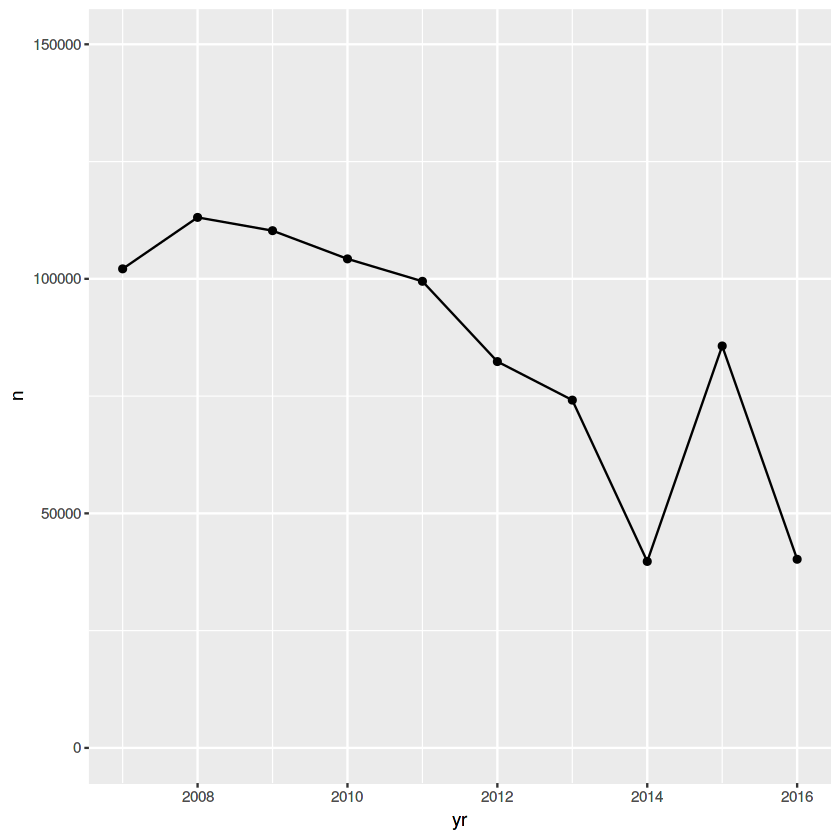

In [49]:
stops_w_yr %>%
    count(yr) %>%
    # "aes()" stands for "aesthetic". 
    # Anything within `aes()` refers to information from our data (stops_w_yr)
    ggplot(aes(x = yr, y = n)) + 
    # geom_point adds points at the x and y coordinates specified
    geom_point() + 
    # geom_line draws lines between x and y coordinates specified
    geom_line() +
    # we can use the function below to control the y axis
    scale_y_continuous(limits = c(0,150000))

In [22]:
# If we want to look date-by-date, we can just use `date` as our x-axis
# And then we can call on the "histogram" function (which would be the
# same as doing a `count(date)` and then a geom_col with x = date, y = n).
# The benefit of geom_histogram() over the count and geom_col method, is that
# with geom_histogram you can control the granularity of your bars.
# Play around with `bins` to see!
stops_w_yr %>%
    ggplot(aes(x = date)) +
    geom_histogram(bins = 500)

ERROR: Error in eval(lhs, parent, parent): object 'stops_w_yr' not found


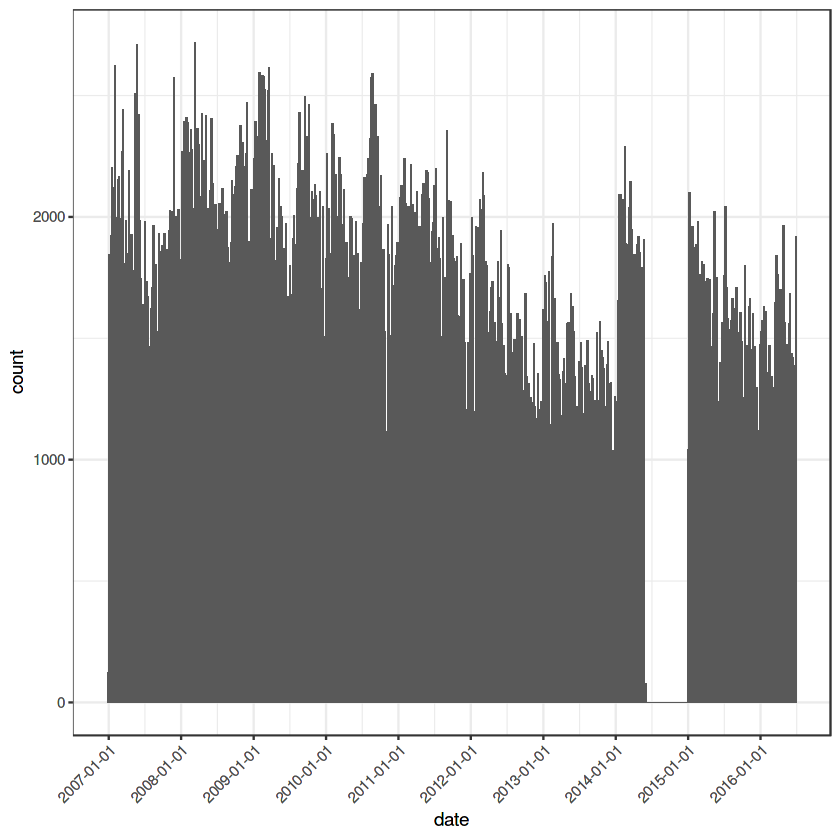

In [123]:
# To focus in on the missing date range, we can use `scale_x_date()` to
# add some breaks in our x-axis.
stops_w_yr %>%
    ggplot(aes(x = date)) +
    geom_histogram(bins = 500) +
    scale_x_date(date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

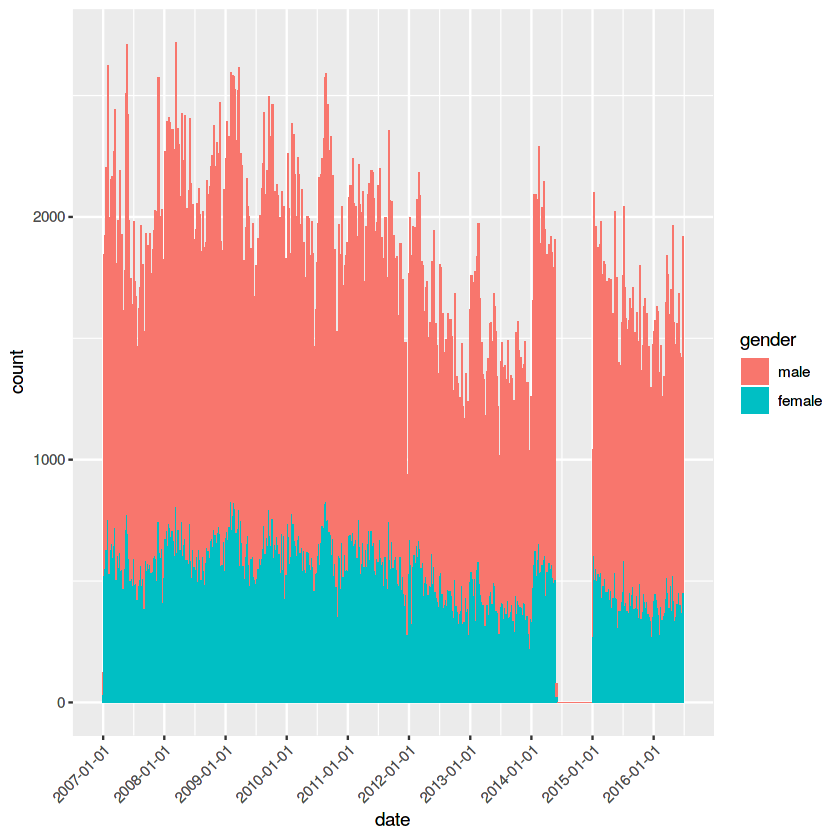

In [56]:
# We can also look at the by-date, by-gender trends using "fill" 
# to distinguish between genders in our dataset
# NOTE: bars/cols/histograms use "fill" to make color, 
#       points and lines use "color"
stops_w_yr %>%
    ggplot(aes(x = date, fill = gender)) +
    geom_histogram(bins = 500) +
    scale_x_date(date_breaks = "1 year") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Exercise 2: Plotting

Create a point and line plot that shows by-year stop counts colored by race.

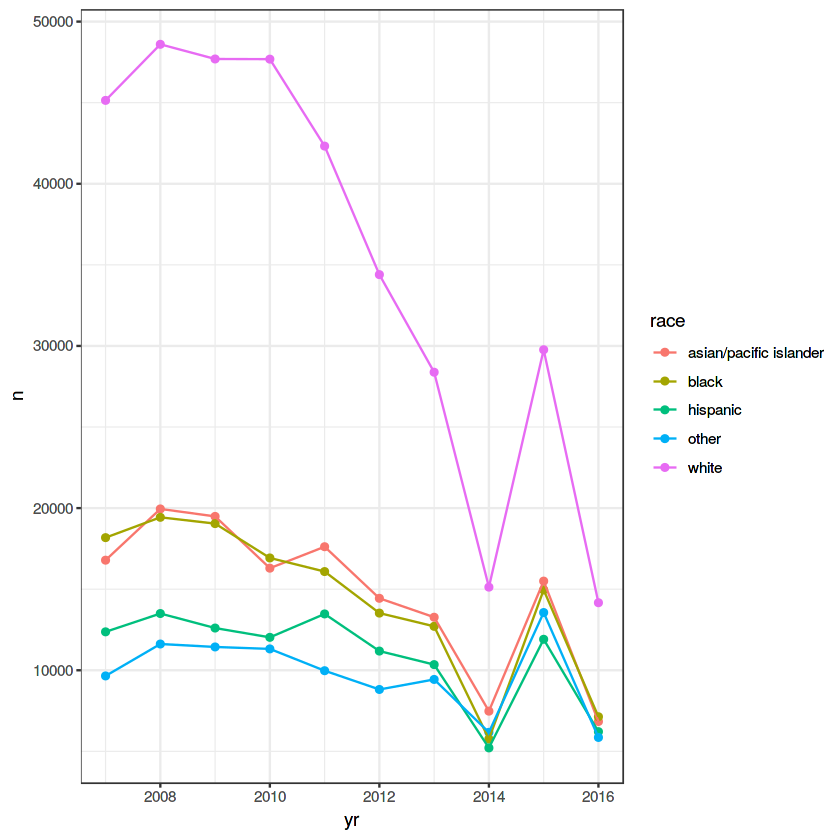

In [122]:
# YOUR CODE HERE
# START
stops_w_yr %>%
    count(yr, race) %>%
    ggplot(aes(x = yr, y = n, color =race)) +
    geom_point() +
    geom_line()
# END

Nice! We'll get back to plotting in a bit. There are _endless_ tweaks and modifications and aesthetic optimizations you can fill your life with. We won't get into too many of those, but there are lots of resources online -- so once you get the basic structure or your plot, making it beautiful is well within reach!


## Back to calculating disparities

In that aside we discovered 2014 and 2016 only have partial years. Let's return to our 2015 dataset, `stops_2015` and calculate how many stops were made of drivers of each race group.

## Exercise 4: Stops by race group

For this next exercise, let's compute the racial breakdown of traffic stops. To do this, we'll need two functions that we've already seen: `count()` and `mutate()`.

1. Count how many stops per race group our `stops_2015` dataset has, saving your result to a new dataframe: `stops_by_race`. 

2. Describe in words what we'd need to do to find the proportion of stops that were of white drivers. 

3. To do the above computation for each race group, we can add additional column to `stops_by_race` using the `mutate()` function. Overwrite `stops_by_race`, adding a new column `p` with the proportion of stops that were made of drivers of each race group.

4. Discuss: What do these proportions mean? Are drivers of certain race groups being stopped more than others? What might we be missing to really start interpreting these values?

In [13]:
# EXERCISE 2: YOUR CODE HERE
# START
# 1. 
stops_by_race <- stops_2015 %>% count(race)
# 2.
# Divide each count (num stops by race) by the total (num overall stops)
# 3. 
stops_by_race <- stops_by_race %>% mutate(p = n / sum(n))
# 4. 
stops_by_race
# This means 35% of stops were of white drivers, 18% of black drivers
# 18% Aisan, 14% Hispanic, etc. 
# It seems like the biggest race group being stopped are white drivers.
# But, i know that SF has a pretty large white population -- probably
# more than 35% of SF is white...so maybe they're actually 
# underrepresented in stops? We'd need to know the population to be 
# able to answer this question of whether some race groups are being 
# stopped disproportionately.
# We see white drivers make up about one-third of stops, and drivers 
# of each other race represent 14-18%. The by-race stop counts are 
# only meaningful, though, when compared to some baseline. If the 
# San Francisco population was about one-third white, one-third 
# percent of stops being of white drivers wouldn't be at all 
# surprising. But if 75% of the SF population is white, then our 
# findings might be more suspicious!
# END

race,n,p
asian/pacific islander,15498,0.181
black,14955,0.175
hispanic,11911,0.139
other,13560,0.158
white,29765,0.347


## Stop rates

In order to do this baseline comparison, we need to understand the racial
demographics in our SF population data. (Note: This is why we wanted just one full year: comparing the number of stops in a year to the population from that year.) The data as we've given it to you
has raw population numbers from 2015. To make it useful, we'll need to compute the
_proportion_ of SF residents in each demographic group. As before, we do this using the `mutate()` function.

### You try

* Take a look at `pop_2015`, then
* mutate `pop_2015`, adding a column `p` that shows us what proportion of the population is white, black, Hispanic, Asian, and other.

In [14]:
# Find the racial breakdown of SF's 2015 population
# START
pop_2015 %>%
    mutate(p = n_people / (sum(n_people)))
# END

race,n_people,p
white,346732,0.4124
black,44879,0.0534
hispanic,128619,0.1530
asian/pacific islander,285266,0.3393
other,35267,0.0419


### Discuss

What do the population proportions tell you about the stop proportions we computed before?


### Adding rigor

We can tell a lot just by eyeballing these two sets of proportions. But let's be a bit more
rigorous about this. If we merge the two tables together, we can compute stop 
rates by race group (i.e., number of stops per person). 

**R function: `inner_join()`**

One way to put tables together is with the `inner_join()` function. We need to
input three things into this function: 
 1. our main table
 2. the second table we'd like to join with the first table, and
 3. instructions on how to join them. 

In this case, the two tables we
want to merge are 
 1. the table of stops counted according to `race`, and
 2. the table of population by race: `pop_2015`. 
 
The instruction for combining the tables is 
 3. to merge rows that give information about the same race groups.

To implement 3., we give `inner_join()` the argument `by =
"race"`. This means that `inner_join()` will 
 * look at the first table---
i.e., the table stops counted by race---and go to the `race` column
in each row.
 * Then, `inner_join()` will take what it finds there---in this case,
`"asian/pacific islander"`, `"black"`, `"hispanic"`, `"other/unknown"`, and
`"white"`---and look in the second table, i.e., `pop_2015`, for all the
rows that contain the same information in `pop_2015`'s race column.
 * Finally,
it will add the second row at the end of the first to create a new row with
information from both. 

What we end up with is a dataframe with all of the
columns from _both_ tables.

The process is a little complicated, and we won't use it too much, so don't
worry if the abstract description doesn't make sense. To get a better
understanding of what's going on, exercise 5 will help guide you through merging the two tables described above,
being sure to include the `by = "race"` argument.


DIGRESSION INTO LEFT/ANTI


## Exercise 5: computing stop rates by race group

1. First, merge together `stops_by_race` and `pop_2015` by "race", using the `merge()` function. Name your result `stops_and_pop_by_race`.
2. Add a column `stop_rate` to `stops_and_pop_by_race`, that is simply the number of stops divided by the number of people. (Hint: the `mutate()` function will be helpful!)
3. Now we can divide the black (or Asian, or Hispanic, or "other") stop rate by the white stop rate to be able to make 
a quantitative statement about how much more often black drivers are stopped compared to white drivers, relative to their share of the city's population. Using `R` as a calculator, do this!
4. Discuss your results.

In [ ]:
# EXERCISE 3: YOUR CODE HERE
# START
# 1.
stops_and_pop_by_race <- 
    merge( # TODO MAKE INNER JOIN
        stops_by_race,
        pop_2015, 
        by = "race"
    )
# 2. 
stop_rates <- 
    stops_and_pop_by_race %>%
    mutate(stop_rate = n / n_people)
# 3. 
stop_rates
# black-white stop rate ratio:
print(0.3332/0.0858)
# Hispanic-white stop rate ratio:
print(0.0926/0.0858)
# Asian-white stop rate ratio:
print(0.0543/0.0858)
# other-white stop rate ratio:
print(0.3845/0.0858)
# END

race,n,p,n_people,stop_rate
asian/pacific islander,15498,0.181,285266,0.0543
black,14955,0.175,44879,0.3332
hispanic,11911,0.139,128619,0.0926
other,13560,0.158,35267,0.3845
white,29765,0.347,346732,0.0858


[1] 3.88
[1] 1.08
[1] 0.633
[1] 4.48


### Thought exercise: where stop rates fall short

While these baseline stats give us a sense that there are racial disparities in
policing practices in SF, they are not strong evidence of discrimination. The
argument against using stop rates (often called "benchmarking" or the "benchmark test") is that we haven't identified the correct
baseline to compare to. 
* Why isn't population the best thing to compare to (i.e., the best denominator of our stop rate)?
* What would the ideal denominator of our stop rate be?
* What other baselines (denominators) could we use? Are any of these ideal?

In [16]:
# Your thoughts here (or just discuss)
# START
# For the stop rate denominator, what we really want to know is what 
# the true distribution is for individuals breaking traffic laws or 
# exhibiting other criminal behavior in their vehicles. But using 
# SF residential population doesn't account for commuting 
# populations, or possible race-specific differences in driving 
# behavior,including amount of time spent on the road (and 
# adherence to traffic laws, as mentioned above).  If black 
# drivers, hypothetically, spend more time on the road than white 
# drivers, that in and of itself could explain the higher stop
# rates we see for black drivers, even in the absence of 
# discrimination.
# We could try using violation rates as a baseline, but those can 
# be racially skewed by the vary systems we're trying to evaluate! 
# We can try something that's less racially skewed, like violent
# crime rates, but violent crime rates have very little to do with
# traffic infractions! We really don't have any ideal baseline here. 
# END 

## Searches

Let's next consider how often drivers of different race groups were searched. Computing search rates is actually easier than stop rates because we don't need an external population benchmark.
We can use the stopped population as our baseline, defining search rate to be the proportion of stopped people who were subsequently searched. 

## Exercise 6: Search rates

1. Compute search rates by race group. (Hint: Think about what information you'd need to compute a search rate. The `n()` function might be helpful!)
2. Discuss the search rate findings. Are some race groups searched more often than other race groups, relative to their share of stopped drivers?

NOTE: Since we're not comparing to population numbers, we can return to using our full `stops_w_yr` dataset, with all years, because in this case it doesn't matter that we don't have full years for 2014 and 2016.

In [72]:
# YOUR CODE HERE
# START
#Search rates, METHOD 1
stops_w_yr %>%
    group_by(race) %>%
    summarize(
        n_searched = sum(searched),
        n_stopped = n(),
        search_rate = n_searched / n_stopped
    )
# Search rates, METHOD 2
# This way is a bit tricky! It relies on the fact that booleans
# (i.e., TRUE and FALSE) can be coerced into integers (1 and 0),
# so `mean(searched)` takes the number of TRUEs divided by the
# number of rows in each race group, which is exactly what METHOD 1
# does, manually.
stops_w_yr %>%
    group_by(race) %>%
    summarize(
        search_rate = mean(searched)
    )
# END

race,n_searched,n_stopped,search_rate
asian/pacific islander,2722,147669,0.0184
black,22363,143754,0.1556
hispanic,11040,108848,0.1014
other,3616,97839,0.0370
white,11362,353281,0.0322


race,search_rate
asian/pacific islander,0.0184
black,0.1556
hispanic,0.1014
other,0.0370
white,0.0322


## Exercise 7: Tricks with booleans

Below is one possible solution to Exercise 6. The function `mean()` is defined over _numbers_, but `searched` is a column of booleans (TRUE/FALSE). Why does this solution work? Play around with treating booleans like numbers. What do you discover? (This behavior is called _coercion_ or _implicit casting_.)

In [77]:
stops_w_yr %>%
    group_by(race) %>%
    summarize(
        search_rate = mean(searched)
    )

race,search_rate
asian/pacific islander,0.0184
black,0.1556
hispanic,0.1014
other,0.0370
white,0.0322


## Thought exercise: where search rates fall short
* Do search rates have similar issues as we found with stop rates? Why or why not?
* What might "justifiably" lead search rates to differ by race group?

In [23]:
# Write your thoughts here (or just discuss)!
# START
# Search rates are slightly less suspect than stop rates, 
# since among the stopped population, it's more reasonable to 
# believe that people of different races offend at equal rates. 
# In the context of searches, this means assuming that all race groups 
# exhibit probable cause of possessing contraband at equal rates. 
# One could claim that the stopped population isn't a good 
# measure of the true racial distribution of probable cause. 
# This is all to say that while benchmark stats (stop rates, 
# search rates) are a good place to start, more investigation is 
# required before we can draw any strong conclusions.
# END

## Outcome test

To circumvent the benchmarking problem, it's common to turn to the search 
decision, rather than the stop decision. This is because we have a notion of
what a "successful" search is. The legal justification for performing a search
is probable cause that the driver possesses contraband. So a successful search
is one which uncovers contraband.

We thus turn to rates of successful searches. That is, what proportion of
searches, by race, were successful? This proportion is known as the contraband
recovery rate, or the "hit rate." If racial groups have different hit rates, it
can imply that racial groups are being subjected to different standards.

## Thought Exercise: Hit rate interpretation

As a caricatured example, suppose among white drivers who were searched, 
officers found contraband 99% of the time, while among black drivers who were
searched, officers found contraband only 1% of the time. 
* Is this police department's search policy discriminatory? 
* Why or why not?
* In general how can we use hit rates to understand whether a search policy is discriminatory?

In [24]:
# Write your thoughts here (or just discuss)!
# START
# These hit rates would lead us to
# believe that officers made sure they were _certain_ 
# white individuals had contraband before deciding to 
# search, but that they were searching black 
# individuals on a whiff of evidence.
# In general, lower hit rates are a sign a group is being
# discriminated against.
# END


Next let's investigate a non-caricatured case: real hit rates by race group in SF.

## Exercise 8: Hit rates

1. Filter to drivers who were searched, and then compute the hit rate (rate of contraband recovery) by race group. Remember your `group_by()` and `summarize()` functions!

2. Discuss your findings. 

In [25]:
# YOUR CODE HERE
# START
# 1.
stops_w_yr %>%
    filter(searched) %>%
    group_by(race) %>%
    summarize(hit_rate = mean(contraband_found))
# 2.
# Looks like the black and Hispanic hit rates are _much_
# lower than the white hit rate -- this is a sign that
# black and Hispanic drivers are probably being discriminated
# against at the search decision.
# END

race,hit_rate
asian/pacific islander,0.3545
black,0.0916
hispanic,0.0990
other,0.2016
white,0.2405


What if hit rates vary by police district? If the bar for stopping
people, irrespective of race, is lower in certain police districts, and black
individuals are more likely to live in neighborhoods in those districts, then
the observed disparities may not reflect bias.

Let's compute hit rates by race _and_ district. We can do this simply by adding multiple arguments to the `group_by()` function. Run the code below.

In [78]:
hit_rates <- 
  stops_w_yr %>% 
  filter(searched) %>% 
  group_by(race, district) %>% 
  summarize(hit_rate = mean(contraband_found))

hit_rates %>% nrow()

[1] 50

This is too many hit rates to compare in one table!

## Exercise 9: Visualization brainstorm

Sketch out using pen and paper (or just describe to a partner) how you might try to use visualizations to help us synthesize the 50 hit rates above. Start with the question we're trying to answer (Are hit rates for minority drivers lower than hit rates for white drivers?) -- and then think about what type of plot might best help you answer that question. See if you can come up with at least 3 different sketches!

## One way to visualize: scatterplots

One way to visualize the data is to make a scatterplot comparing white hit rates to each non-white race group. To do this, though, we need to reshape our data, so that each row allows us to compare white hit rate in a district, to each minority hit rate in that same district. 

The code below uses some tricky functions `spread` and `gather`. They're notoriously mind-bending, so the `tidyverse` team is actually developing new functions (`pivot_wider()` and `pivot_longer()`) to replace them soon. We'll walk you through this below, but don't get too hung up on it, since soon (like any day now) there will be more intuitive versions of these functions released.

In [96]:
# Reshape table to show hit rates of minorities vs white drivers
reshaped_hit_rates <-
  hit_rates %>% 
  # the column names (key) will be race, the values will be from hit rate
  spread(key = race, value = hit_rate, fill = 0) %>% 
  rename(white_hit_rate = white) %>% 
  # gather leaves us with two new columns: 
  # minority race (which contain the old colnames)
  # and minority hit rate (which contains the values in the old columns)
  gather(
      key = minority_race, value = minority_hit_rate, 
      # columns to gather:
      c(black, hispanic, `asian/pacific islander`, other)
  ) %>%
  arrange(district)

head(hit_rates %>% arrange(district))
head(reshaped_hit_rates)

race,district,hit_rate
asian/pacific islander,A,0.3512
black,A,0.1010
hispanic,A,0.0996
other,A,0.2522
white,A,0.2339
asian/pacific islander,B,0.2656


district,white_hit_rate,minority_race,minority_hit_rate
A,0.234,black,0.1010
A,0.234,hispanic,0.0996
A,0.234,asian/pacific islander,0.3512
A,0.234,other,0.2522
B,0.225,black,0.1065
B,0.225,hispanic,0.0787


Now we're ready to make a basic scatter plot! We'll walk you through it in the exercise below.

## Exercise 10: Scatterplot of racial disparities

1. Warm-up. Before we plot, let's do some tidyverse magic. To make our plot nice in step 2, we'll need the range of hit rates. Create a variable `max_hit_rate` that extracts the largest hit rate value in `reshaped_hit_rates`. There are many many different ways to do this, so don't be afraid to play around!
2. Onward to plotting! First let's start simple. Filter `reshaped_hit_rates` to just `black` and `white` race groups (i.e., let's only consider rows where `minority_race` is "black"). Let's next create a scatterplot comparing black and white hit rates. Consider the following questions/hints:
  * What do you want your x- and y-axes to be?
  * Which `geom_X` would you use to creat scatterplot points?
  * We want to compare apples to apples, so we want the x- and y-axis scales to cover the same range. To do this, we can use `scale_x_continuous()` and `scale_y_continuous()`. Both of these functions have an argument called `limits`. The basic usage is `scale_x_continuous(limits = c(A, B))`, where `A` is the lower limit of your range (we can just use 0), and `B` is the upper limit of your range (we can `max_hit_rate` from Q1 above). 
    Try adding and removing these two lines of code -- how does it change the plot? Why is it critical in this case?
3. Now, to incorporate all minority race groups in our dataset, let's return to the unfiltered `reshaped_hit_rates`. Instead, let's create a panel for each race-pair we're comparing. We can do this simply by adding `facet_wrap(facets = vars(minority_race))` to the previous code. Try it! What do you see?

In [124]:
# YOUR CODE (EXERCISE 10, Q1)
# START
# We'll use this just to make our axes' limits nice and even
max_hit_rate <-
  reshaped_hit_rates %>% 
  select(ends_with("hit_rate")) %>% 
  max()
# END

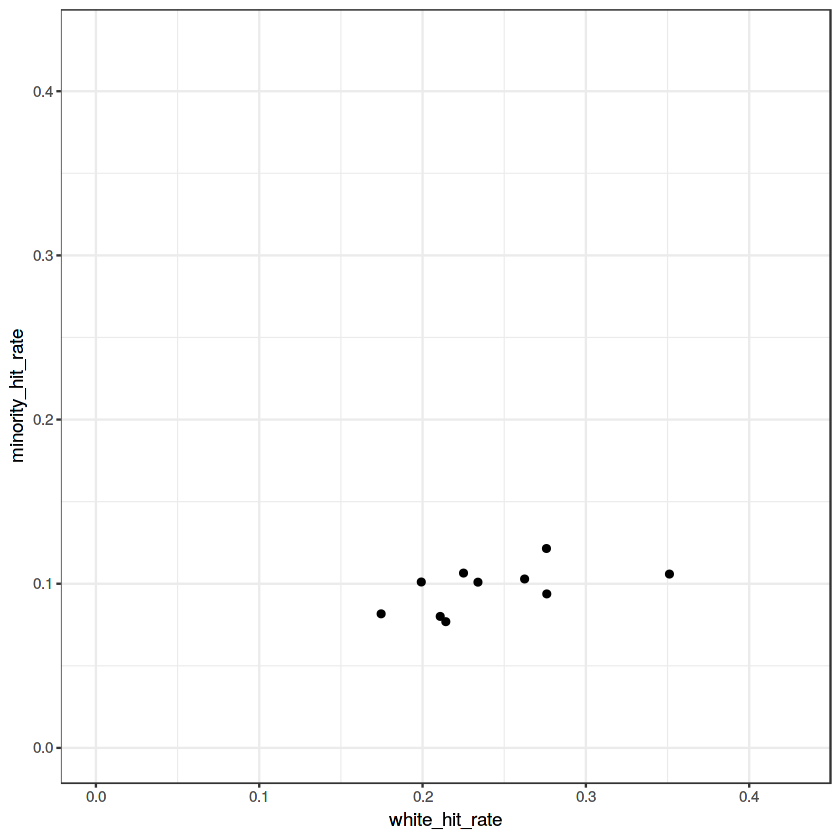

In [125]:
# YOUR CODE (EXERCISE 10, Q2)
# START
reshaped_hit_rates %>% 
  filter(minority_race == "black") %>%
  ggplot(aes(
    x = white_hit_rate,
    y = minority_hit_rate
  )) +
  geom_point() +
  scale_x_continuous(limits = c(0,max_hit_rate)) +
  scale_y_continuous(limits = c(0,max_hit_rate))
# END

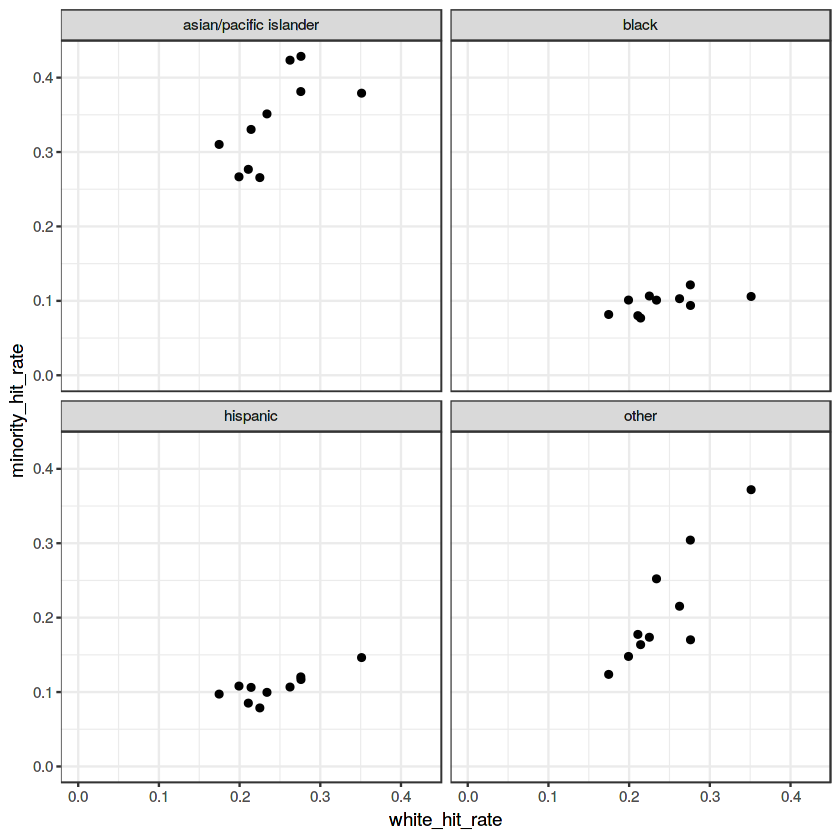

In [127]:
# YOUR CODE (EXERCISE 10, Q3)
# START
reshaped_hit_rates %>% 
  ggplot(aes(
    x = white_hit_rate,
    y = minority_hit_rate
  )) +
  geom_point() +
  scale_x_continuous(limits = c(0,max_hit_rate)) +
  scale_y_continuous(limits = c(0,max_hit_rate)) +
  facet_wrap(vars(minority_race))
# END

Below are some slight tweaks to make the plot a bit more readable. Let's go through these additions together to make sure they make sense. Below, we're going to:

HAVE THEM DO AXIS LABELS AND REFERENCE LINE (EARLIER)

* Size the points by number of searches
* Add a reference line in to demarcate "fairness"
* Use percentages rather than proportions for the axes
* Make the labels pretty

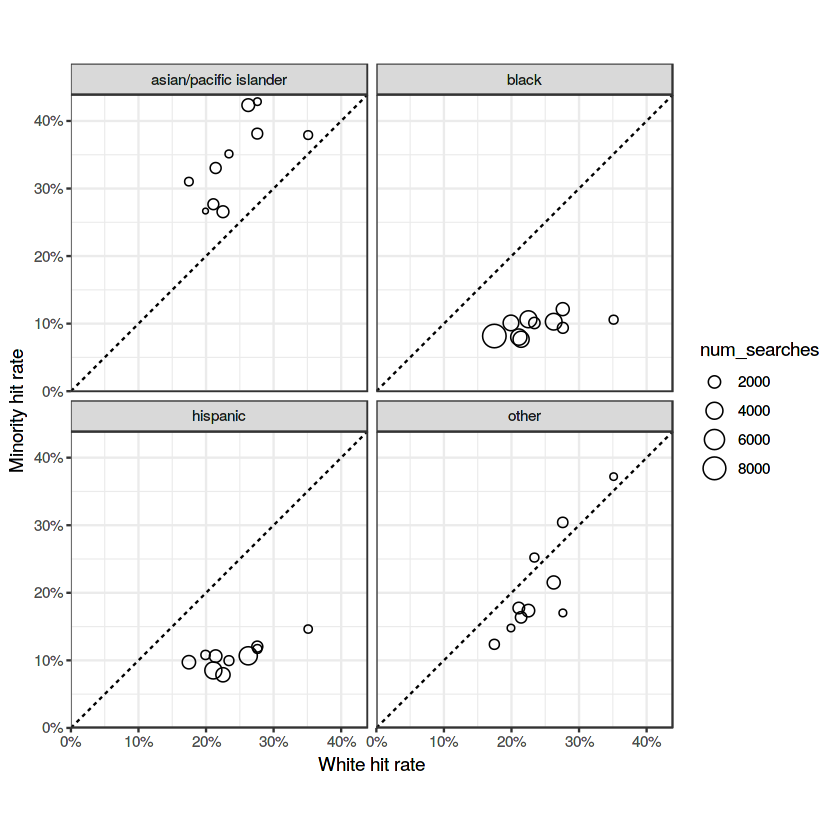

In [131]:
# Get corresponding number of searches (to size points).
# Again, for each district we want to know the number of white+black searches
# and white+Hispanic searches. This requires the same spreading and gathering
# as our previous data-munging.
search_counts <-
  stops_w_yr %>% 
  filter(searched) %>%  
  count(district, race) %>% 
  spread(race, n, fill = 0) %>% 
  rename(num_white_searches = white) %>% 
  gather(
      minority_race, num_minority_searches, 
      c(black, hispanic, `asian/pacific islander`, other)
  ) %>% 
  mutate(num_searches = num_minority_searches + num_white_searches) %>% 
  select(district, minority_race, num_searches)

# Now let's plot!
reshaped_hit_rates %>% 
  left_join(
    search_counts, 
    by = c("district", "minority_race")
  ) %>% 
  ggplot(aes(
    x = white_hit_rate,
    y = minority_hit_rate
  )) +
  geom_point(aes(size = num_searches), pch = 21) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  scale_x_continuous("White hit rate", 
    limits = c(0, max_hit_rate + 0.01),
    labels = scales::percent_format(accuracy = 1),
    # forces axis to start _right_ at zero, no gap
    expand = c(0,0)
  ) +
  scale_y_continuous("Minority hit rate", 
    limits = c(0, max_hit_rate + 0.01),
    labels = scales::percent_format(accuracy = 1),
    # forces axis to start _right_ at zero, no gap
    expand = c(0,0)
  ) +
  coord_fixed() +
  facet_wrap(vars(minority_race))

## Exercise 11: Plot interpretation

Explain what you see above. What does each point represent? What does the dotted line represent? What do these plots tell us about discrimination in search practices?

## Modeling

Plotting allowed us to synthesize fifty hit rates into an understanding of racial disparities in SF's search policy. Our plot provides us with evidence that these searches are discriminatory against black and Hispanic drivers. 

What if we want to _quantify_ this disparity? Our plot just gives us intuition. Similar to how we were able to compute the ratio between black hit rates and white hit rates for the aggregate hit rate data (citywide), we might want to know what those ratios would be in each district. Instead of separately computing the hit rate for each race/district, we can instead use modeling to put numbers on these disparities. We can use *regression*: computing how likely an officer was to find contraband given the drivers' race and district.

We're not going to teach the statistics behind regression right now. If you already know about regression, we're here to teach you how to run a regression in `R`. If you've never heard of regression before, maybe this short soiree into modeling will inspire you to learn! 

Our _outcome_ or _response_ variable, `contraband_found`, is a boolean (TRUE/FALSE, or 1/0) -- also known as a "binomial" variable. Recall that when we have an binomial outcome like this, we use logistic regression.

Below, we create a dataframe with just the searches, and we convert all categorical variables to factors. A "factor" in `R` is has explicit levels -- it's telling the model not to derive a coefficient for each value within `race` and `district` (rather than treating them as continuous variables, with a single coefficient).

SECOND, Follow up with USE LM (linear prob model) -- it's not guaranteed...needs truncation

For the model itself, we use `glm()`, which stands for "generalized linear model". We simply give `glm()` a formula: `response ~ covariate_1 + covariate_2 + ... + covariate_n`, the data, and then we specify the type of model we want to fit using the `family` argument. Logistic regression is "binomial" family.

In [138]:
library(broom) #library for turning messy r output to tidy dataframes

searched_df <- stops_w_yr %>% 
    filter(searched) %>%
    mutate(
        race = factor(race),
        district = factor(district)
    )

mod <- glm(
    contraband_found ~ race + district, 
    data = searched_df, 
    family = 'binomial'
)

tidy(mod)

term,estimate,std.error,statistic,p.value
(Intercept),-0.6245,0.0634,-9.85,6.81e-23
raceblack,-1.5349,0.0479,-32.04,2.67e-225
racehispanic,-1.5098,0.0524,-28.82,1.18e-182
raceother,-0.7079,0.0581,-12.18,3.78e-34
racewhite,-0.4961,0.0462,-10.74,6.96e-27
districtB,-0.1288,0.0634,-2.03,4.22e-02
districtC,-0.2832,0.0616,-4.60,4.31e-06
districtD,-0.2381,0.0639,-3.73,1.95e-04
districtE,-0.2041,0.0664,-3.08,2.10e-03
districtF,0.0901,0.0751,1.20,2.30e-01


Notice that there is no term for "asian/pacific islander" or "district A" in the above table.  This is because they were set as reference levels, which happens whenever you use a categorical variable in a regression.  We want to set white as the reference level for race so that we can read the coefficients for other races as comparisons to white hit rates. We can do this using the `relevel` function. 

In [139]:
searched_df <- searched_df %>%
    mutate(race = relevel(race, ref = 'white'))

mod <- glm(
    contraband_found ~ race + district, 
    data = searched_df, 
    family = 'binomial'
)
tidy(mod)

term,estimate,std.error,statistic,p.value
(Intercept),-1.1206,0.0535,-20.96,1.46e-97
raceasian/pacific islander,0.4961,0.0462,10.74,6.96e-27
raceblack,-1.0388,0.0336,-30.91,8.77e-210
racehispanic,-1.0137,0.0398,-25.46,5.89e-143
raceother,-0.2118,0.0472,-4.48,7.33e-06
districtB,-0.1288,0.0634,-2.03,4.22e-02
districtC,-0.2832,0.0616,-4.60,4.31e-06
districtD,-0.2381,0.0639,-3.73,1.95e-04
districtE,-0.2041,0.0664,-3.08,2.10e-03
districtF,0.0901,0.0751,1.20,2.30e-01


Now let's summarize our results by pulling out only the information we care about.

In [24]:
# HAVE THEM DO PART OF THIS
tidy(mod) %>%
    filter(str_detect(term, "race")) %>%
    mutate(
        race = str_remove_all(term, "race"),
        conf_int_95 = str_c(
            "(", round(estimate - 1.96*std.error, 3),
            ", ", round(estimate + 1.96*std.error, 3), ")"
        ),
        likelihood_recovery_v_white = exp(estimate)
    ) %>%
    select(race, estimate, conf_int_95, likelihood_recovery_v_white)

ERROR: Error in tidy(mod): could not find function "tidy"


A _negative_ coefficient estimate tells us that searches of that race group are _less_ likely to recovery contraband than searches of white drivers in the same district.

In line with our plots, we see that searches of both black and Hispanic drivers recover significantly less contraband than searches of white drivers. By exponentiating the point estimates, we can acquire values than allow us to make quantitative statements: Searches of black and Hispanic drivers recover contraband only 35% as often as searches of white drivers.

TODO FIRST HAVE THEM DO SEARCH RATES, with more covariates, with conf ints
THEN DO MODEL PREDICTION, with conf int on mean estimates
MAYBE ALSO FIT LM???

### Model prediction

Often times you'll want to train a model in order to use it to make predictions. Now that we have our model, `mod`, let's say we wanted to predict the probability that a white person living in district E who was searched would be found to have contraband on them. Here's how we'd do that:

In [153]:
person <- tibble(
    race = c('white'),
    district = c('E')
)
predict(mod, person, type = 'response') %>% round(3)

1 
0.21

**Statistical note:** We need `type = 'response'` so that R knows we want it to output probabilities.  Otherwise, it will output log odds, which is the scale that logistic regression uses.  

ALSO DO LOG ODDS OUTPUTS (FIRST) AND THEN TELL THEM NEED RESPONSE

### Exercise 12: Many predictions

Instead of just passing one person to `predict()`, we can pass in lots of different people! 
1. Create a dataframe (or "tibble") called `people`, with 10 rows and two columns. As with `person` our columns will be "race" and "district. Let's make all 10 people white, and each of them in a different district (there are 10 districts in our dataset). Hint: the function `rep()` might be helpful!
2. Now use `predict` to calculate how likely a searched white person is to be carrying contraband in each district in SF.

In [158]:
# YOUR CODE HERE
# START
people <- tibble(
    race = rep('white', 10),
    district = unique(stops_w_yr$district)
)
predict(mod, people, type='response') %>% round(3)
# END


1     2     3     4     5     6     7     8     9    10 
0.197 0.223 0.285 0.246 0.220 0.210 0.259 0.328 0.263 0.204

## Open-ended exploration

Now that you have a majority of the tools you need to perform data analysis, let's take some time to let you explore! 

### Exercise 13: Exploring SF traffic stops MOVE TO BEFORE THEt MODELING

Come up with a question you have about the SF traffic stops dataset and see if you can use your new `R` skills to answer it!

If you're having a lapse in creative questioning, here are a few to get you started:
* What are arrest rates by race? By gender?
* Check out the "reason_for_stop" column. Among stops made for "Assistance to motorist", what's the search rate for black men vs white men?
* Are stops more likely to happen at certain times of day?


In [217]:
# YOUR CODE HERE

## NEW DATA SET!
TRY BASKETBALL DATASET

For our final bit of `R`, let's get down some basics of map-making!

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [17]:
api_key <- trimws(read_file("/share/data/mnpd/api.key"))


In [9]:
left <- stops$lat %>% min(na.rm = T)
right <- stops$lat %>% max(na.rm = T)
# Create variables `top` and `bottom`
# YOUR CODE HERE
# START
top <- stops$lng %>% max(na.rm = T)
bottom <- stops$lng %>% min(na.rm = T)
# END

bounding_box <- c(left, bottom, right, top)

In [21]:
register_google(api_key)
map <- get_map(
  location = c(lon = bottom, lat = left),
  maptype = 'terrain', color='bw',
  zoom = 11
)
ggmap(map)

Source : https://maps.googleapis.com/maps/api/staticmap?center=36.038676,-123.767429&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx-sQ4
Warning message in get_googlemap(center = location, zoom = zoom, maptype = maptype, :
“HTTP 400 Bad Request”

ERROR: Error in aperm.default(map, c(2, 1, 3)): invalid first argument, must be an array


In [232]:
?get_map

get_map {ggmap},R Documentation
location,"an address, longitude/latitude pair (in that order), or left/bottom/right/top bounding box"
zoom,"map zoom, an integer from 3 (continent) to 21 (building), default value 10 (city). openstreetmaps limits a zoom of 18, and the limit on stamen maps depends on the maptype. ""auto"" automatically determines the zoom for bounding box specifications, and is defaulted to 10 with center/zoom specifications. maps of the whole world currently not supported."
scale,scale argument of get_googlemap or get_openstreetmap
maptype,"character string providing map theme. options available are ""terrain"", ""terrain-background"", ""satellite"", ""roadmap"", and ""hybrid"" (google maps), ""terrain"", ""watercolor"", and ""toner"" (stamen maps), or a positive integer for cloudmade maps (see ?get_cloudmademap)"
source,"Google Maps (""google""), OpenStreetMap (""osm""), Stamen Maps (""stamen"")"
force,force new map (don't use archived version)
messaging,turn messaging on/off
urlonly,return url only
filename,destination file for download (file extension added according to format). Default NULL means a random tempfile.
crop,(stamen and cloudmade maps) crop tiles to bounding box
